<a href="https://colab.research.google.com/github/BenyFridd/animalPose/blob/main/animalpose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.patches import Circle


In [ ]:
import json

# Carregar o arquivo keypoints.json
file_path = '/content/drive/MyDrive/archive/keypoints.json'
with open(file_path, 'r') as file:
    keypoints_data = json.load(file)

# Filtrar apenas as imagens da categoria 5 (vacas)
cow_images = [entry for entry in keypoints_data['annotations'] if entry['category_id'] == 5]

# Verificar quantas imagens de vacas temos
len(cow_images)


842

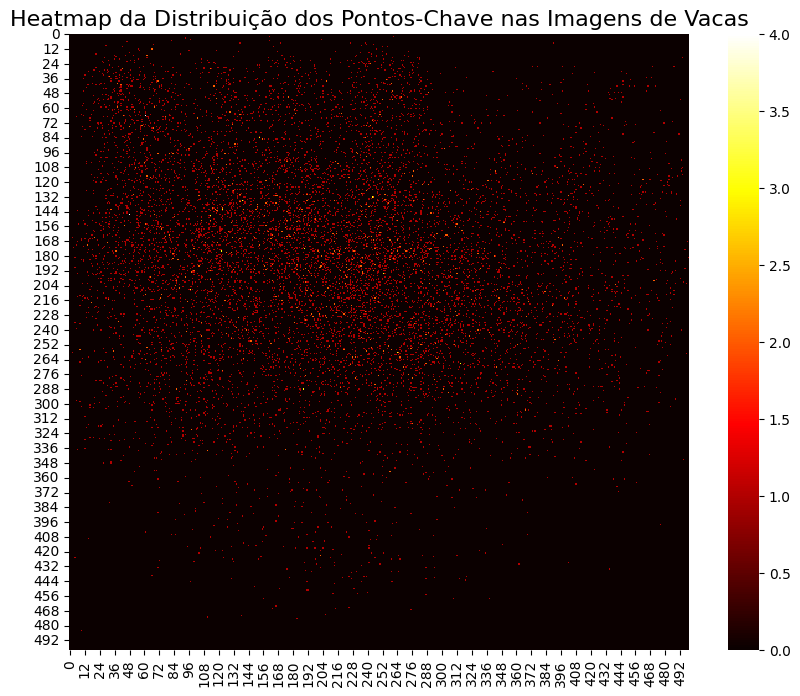

In [ ]:
import numpy as np
import seaborn as sns

# Criar uma grade de calor (heatmap) para os pontos-chave X e Y
heatmap_data = np.zeros((500, 500))  # Ajuste o tamanho da imagem se necessário

for entry in cow_images:
    keypoints = entry['keypoints']
    for kp in keypoints:
        if kp[2] == 1:  # Se o ponto-chave for visível
            x, y = kp[0], kp[1]
            if x > 0 and y > 0:  # Ignorar valores não válidos
                heatmap_data[int(y), int(x)] += 1

# Plotar o heatmap
plt.figure(figsize=(10,8))
sns.heatmap(heatmap_data, cmap='hot', cbar=True)
plt.title('Heatmap da Distribuição dos Pontos-Chave nas Imagens de Vacas', fontsize=16)
plt.show()


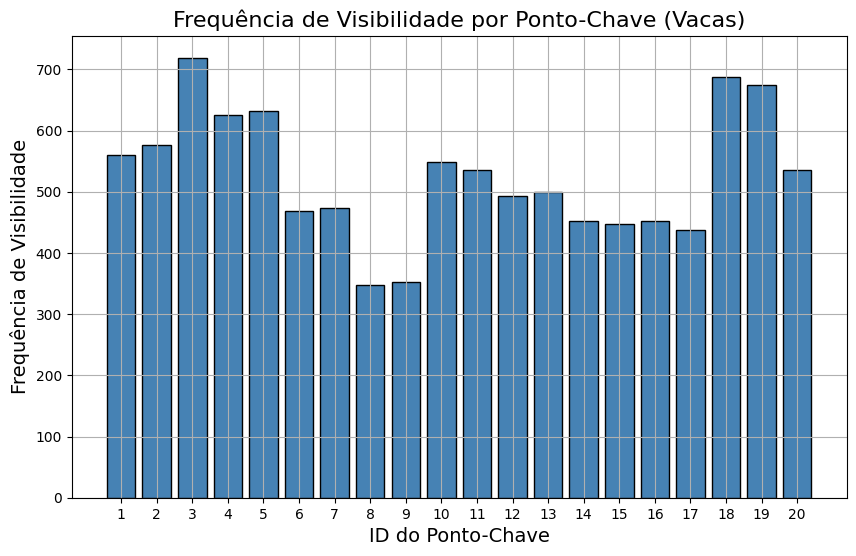

In [ ]:
# Criar um gráfico de barras com a frequência de visibilidade dos pontos-chave
keypoint_visibility = np.zeros(20)  # Existem 20 keypoints possíveis

for entry in cow_images:
    keypoints = entry['keypoints']
    for idx, kp in enumerate(keypoints):
        if kp[2] == 1:  # Se o ponto estiver visível
            keypoint_visibility[idx] += 1

# Plotar gráfico de barras
plt.figure(figsize=(10,6))
plt.bar(range(1, 21), keypoint_visibility, color='steelblue', edgecolor='black')
plt.title('Frequência de Visibilidade por Ponto-Chave (Vacas)', fontsize=16)
plt.xlabel('ID do Ponto-Chave', fontsize=14)
plt.ylabel('Frequência de Visibilidade', fontsize=14)
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()


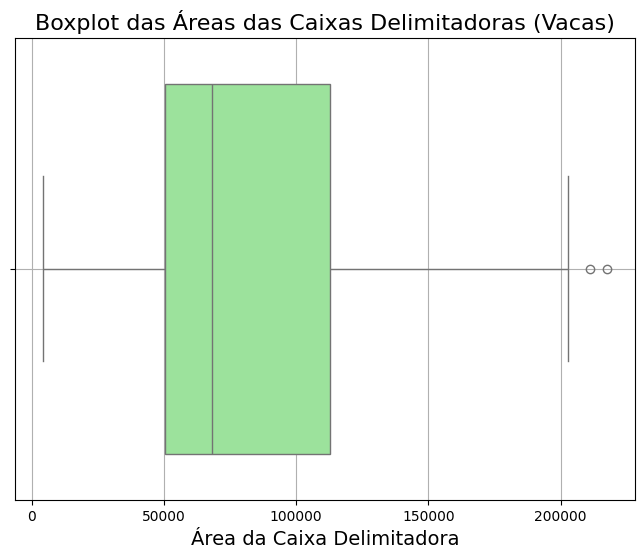

In [ ]:
# Calcular a área das caixas delimitadoras
bbox_areas = [(entry['bbox'][2] * entry['bbox'][3]) for entry in cow_images]

# Gerar o boxplot
plt.figure(figsize=(8,6))
sns.boxplot(data=bbox_areas, orient='h', color='lightgreen')
plt.title('Boxplot das Áreas das Caixas Delimitadoras (Vacas)', fontsize=16)
plt.xlabel('Área da Caixa Delimitadora', fontsize=14)
plt.grid(True)
plt.show()


In [ ]:
# Visualizar a estrutura do JSON
print(keypoints_data.keys())  # Ver as chaves principais
print(keypoints_data['annotations'][0])  # Ver o primeiro item nas anotações (se houver)


dict_keys(['images', 'annotations', 'categories', 'info'])
{'image_id': 1, 'bbox': [123, 115, 379, 275], 'keypoints': [[193, 216, 1], [160, 217, 1], [174, 261, 1], [204, 186, 1], [152, 182, 1], [0, 0, 0], [0, 0, 0], [273, 168, 1], [0, 0, 0], [0, 0, 0], [0, 0, 0], [266, 225, 1], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [190, 145, 1], [351, 238, 1]], 'num_keypoints': 20, 'category_id': 1}


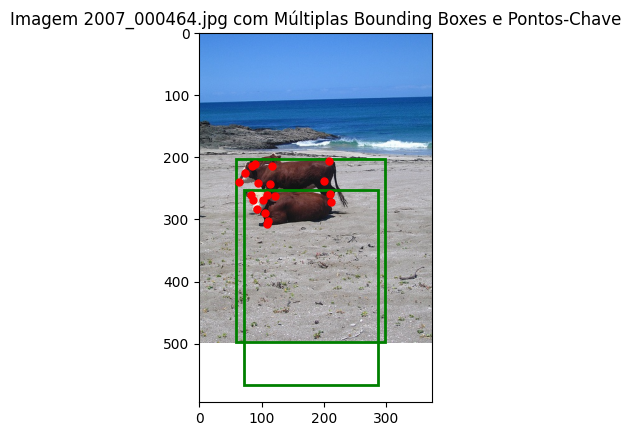

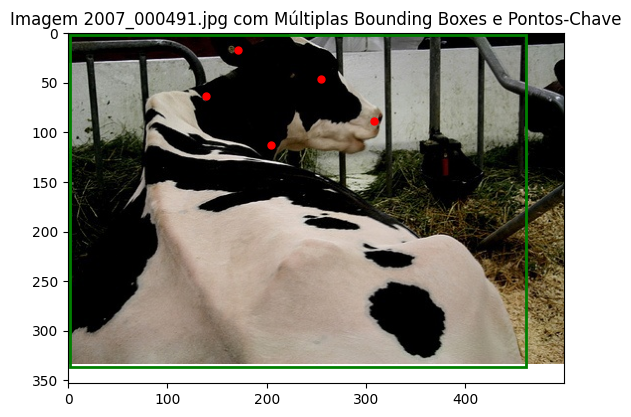

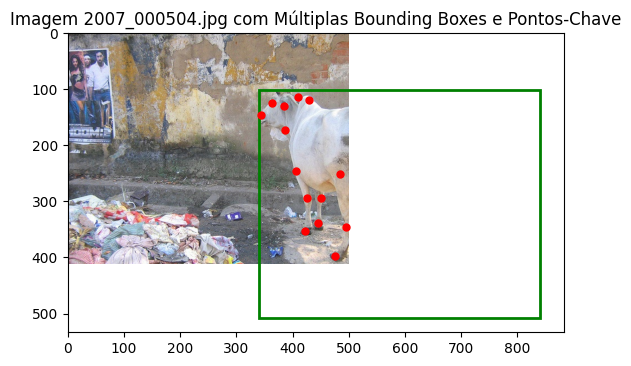

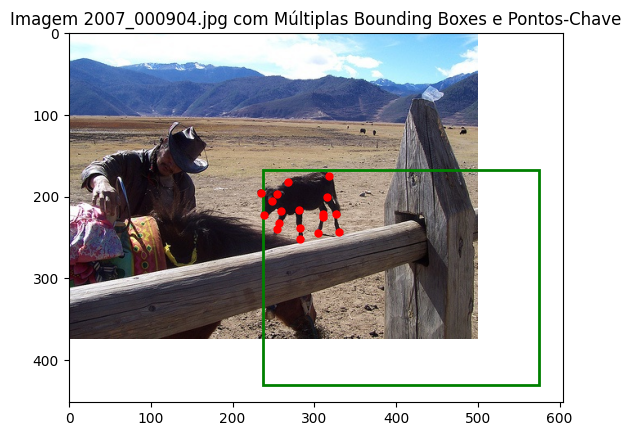

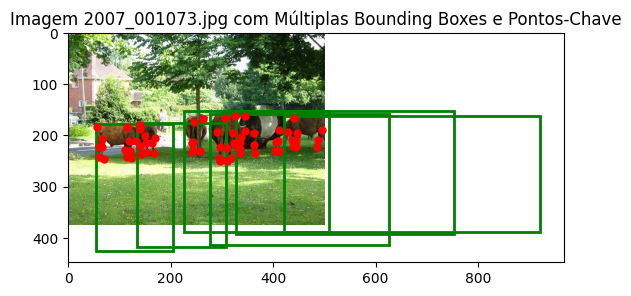

In [ ]:
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Caminho para a pasta de imagens
image_path = '/content/drive/MyDrive/archive/images/images'

# Carregar o arquivo JSON completo
with open('/content/drive/MyDrive/archive/keypoints.json', 'r') as file:
    keypoints_data = json.load(file)

# 'images' já é um dicionário, então vamos usá-lo diretamente
image_id_to_filename = keypoints_data['images']  # Mapeia diretamente 'image_id' para o nome do arquivo

# Função para processar as imagens
def process_image(image_id, annotations):
    # Buscar o nome do arquivo correto no mapeamento usando o image_id
    image_file = image_id_to_filename.get(str(image_id))  # Certifique-se de que o image_id é string

    if not image_file:
        print(f"Arquivo de imagem para image_id {image_id} não encontrado.")
        return

    try:
        # Carregar a imagem usando o nome correto do arquivo
        image_full_path = f"{image_path}/{image_file}"
        image = Image.open(image_full_path)

        # Criar uma figura e plotar a imagem
        fig, ax = plt.subplots(1)
        ax.imshow(image)

        # Para cada anotação, adicionar bounding box e pontos-chave
        for entry in annotations:
            bbox = entry['bbox']
            keypoints = entry['keypoints']

            # Garantir que a bounding box tenha 4 valores (x, y, width, height)
            if len(bbox) == 4:
                x, y, width, height = bbox
                rect = patches.Rectangle((x, y), width, height, linewidth=2, edgecolor='green', facecolor='none')
                ax.add_patch(rect)
            else:
                print(f"Bounding box inválida para image_id {image_id}: {bbox}")

            # Adicionar os pontos-chave na imagem
            for kp in keypoints:
                keypoint_x = kp[0]
                keypoint_y = kp[1]
                visibility = kp[2]

                # Somente plotar pontos visíveis e que têm coordenadas válidas
                if visibility == 1 and keypoint_x > 0 and keypoint_y > 0:
                    plt.plot(keypoint_x, keypoint_y, 'ro', markersize=5)

        plt.title(f"Imagem {image_file} com Múltiplas Bounding Boxes e Pontos-Chave")
        plt.show()
    except FileNotFoundError:
        print(f"Imagem {image_full_path} não encontrada. Verifique o nome do arquivo ou o caminho.")

# Processar no máximo 5 imagens de vacas (categoria_id == 5)
processed_image_ids = set()  # Manter controle de quais imagens já foram processadas
image_limit = 5
image_count = 0

for entry in keypoints_data['annotations']:
    if entry['category_id'] == 5:
        image_id = entry['image_id']

        # Se a imagem já foi processada, apenas adicionamos a anotação
        if image_id in processed_image_ids:
            continue

        # Coletar todas as anotações (bounding boxes e keypoints) para este image_id
        annotations_for_image = [e for e in keypoints_data['annotations'] if e['image_id'] == image_id]

        # Processar a imagem com todas as anotações
        process_image(image_id, annotations_for_image)

        # Marcar a imagem como processada
        processed_image_ids.add(image_id)

        # Incrementar o contador de imagens processadas
        image_count += 1

        # Parar após processar 5 imagens
        if image_count >= image_limit:
            break


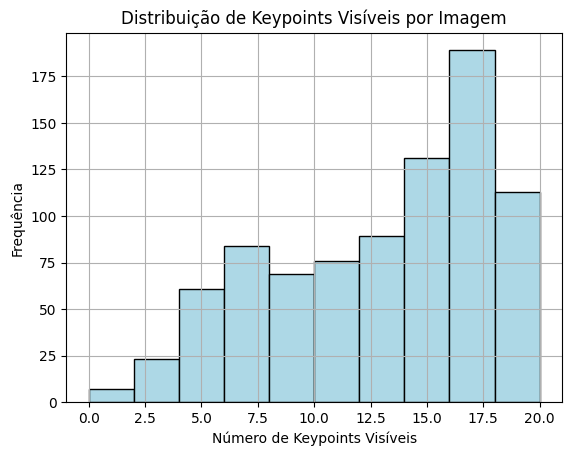

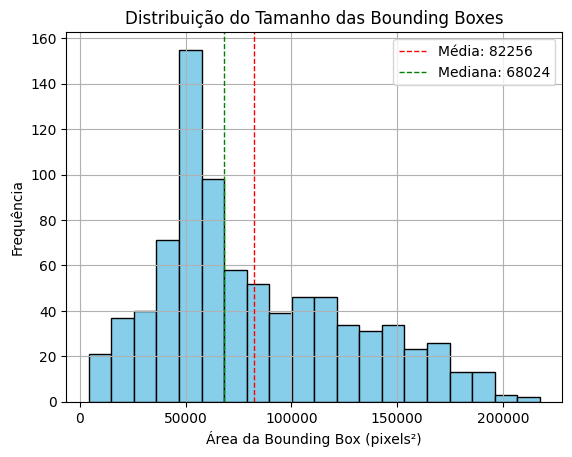

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Coletar estatísticas do processamento de vacas
bovinos_stats = []
visible_keypoints_count = []  # Para analisar a visibilidade dos keypoints

for entry in keypoints_data['annotations']:
    if entry['category_id'] == 5:
        image_id = entry['image_id']
        num_keypoints = entry['num_keypoints']
        bbox_area = entry['bbox'][2] * entry['bbox'][3]  # largura * altura
        visible_keypoints = sum([1 for kp in entry['keypoints'] if kp[2] == 1])  # Contar keypoints visíveis

        bovinos_stats.append({
            'image_id': image_id,
            'num_keypoints': num_keypoints,
            'bbox_area': bbox_area,
            'visible_keypoints': visible_keypoints
        })

# Converter em DataFrame para facilitar análise
df_bovinos = pd.DataFrame(bovinos_stats)

# 1. Gráfico de Distribuição dos Keypoints Visíveis
plt.hist(df_bovinos['visible_keypoints'], bins=10, color='lightblue', edgecolor='black')
plt.title('Distribuição de Keypoints Visíveis por Imagem')
plt.xlabel('Número de Keypoints Visíveis')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# 2. Gráfico de Distribuição do Tamanho das Bounding Boxes com Média/Mediana
plt.hist(df_bovinos['bbox_area'], bins=20, color='skyblue', edgecolor='black')

# Adicionar linhas de média e mediana
media_bbox = np.mean(df_bovinos['bbox_area'])
mediana_bbox = np.median(df_bovinos['bbox_area'])

plt.axvline(media_bbox, color='red', linestyle='dashed', linewidth=1, label=f'Média: {media_bbox:.0f}')
plt.axvline(mediana_bbox, color='green', linestyle='dashed', linewidth=1, label=f'Mediana: {mediana_bbox:.0f}')

plt.title('Distribuição do Tamanho das Bounding Boxes')
plt.xlabel('Área da Bounding Box (pixels²)')
plt.ylabel('Frequência')
plt.legend()
plt.grid(True)
plt.show()


In [1]:
!pip install mediapipe


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 11.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.5 which is incompatible.


/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


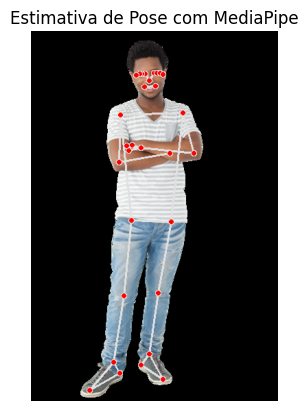

In [3]:
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Inicializando o módulo de pose do MediaPipe
mp_pose = mp.solutions.pose
pose = mp_pose.Pose(static_image_mode=True, model_complexity=2)

# Função para processar imagens e estimar pose usando MediaPipe
def estimate_pose_with_mediapipe(image_path):
    # Carregar a imagem usando OpenCV e converter para RGB
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Executar o MediaPipe Pose para estimativa de pose
    results = pose.process(image_rgb)

    # Verificar se a pose foi detectada
    if results.pose_landmarks:
        annotated_image = image.copy()
        mp.solutions.drawing_utils.draw_landmarks(
            annotated_image,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS)

        # Mostrar a imagem anotada com os pontos de pose
        plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
        plt.title('Estimativa de Pose com MediaPipe')
        plt.axis('off')
        plt.show()
    else:
        print("Nenhuma pose detectada na imagem.")

# Exemplo de processamento com uma imagem de vaca (image_id mapeado para arquivo de imagem)
image_file = '/content/homem.png'
estimate_pose_with_mediapipe(image_file)
